Linear regression can be used to fit predictive model to an observed data set of y and X values if the goal is prediction or forecasting. 
In this case, we choose linear regression for our data analysis. First, we divide the data into 2 parts of training and testing. Then we use the training section for starting analysis and defining the model. 

# Apple stock's prediction using Linear regression

Dataset is based on the stock Apple stock from Yahoo Finance which includes dats, open, high, low, close prices and volumne. 
 

# Import Libraries

In [87]:
import pandas as pd 
import numpy as np
from sklearn import metrics 
%matplotlib inline 
import matplotlib.pyplot as plt

# Reading data from CSV file

In [88]:
df = pd.read_csv("/Users/nancymai/Desktop/AAPL.csv")

In [89]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600
1,2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217346,83474400
2,2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557114,79724800
3,2022-03-03,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
4,2022-03-04,164.490005,165.550003,162.100006,163.169998,162.187515,83737200


In [90]:
df.shape

(250, 7)

# Removing unwanted columns from the Data Frame

In [91]:
df.drop('Adj Close', axis=1, inplace = True)

In [92]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-02-28,163.059998,165.419998,162.429993,165.119995,95056600
1,2022-03-01,164.699997,166.600006,161.970001,163.199997,83474400
2,2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800
3,2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400
4,2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200


# Exploring data

In [73]:
df['Date'] = pd.to_datetime(df.Date)

In [74]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [75]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Open    250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Close   250 non-null    float64       
 5   Volume  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [77]:
df.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,150.614000,152.724080,148.651240,150.773480,8.431710e+07
std,12.171212,12.092309,12.199884,12.185937,2.339291e+07
min,126.010002,127.769997,124.169998,125.019997,3.519590e+07
25%,142.099998,143.722496,139.924995,142.457497,6.887175e+07
50%,149.220002,151.285004,147.445000,149.769996,7.936810e+07
75%,159.729999,162.004997,156.620002,158.380005,9.353830e+07
max,178.550003,179.610001,176.699997,178.960007,1.826020e+08


In [78]:
print(len(df))

250


# Visualizing the data 

<AxesSubplot:>

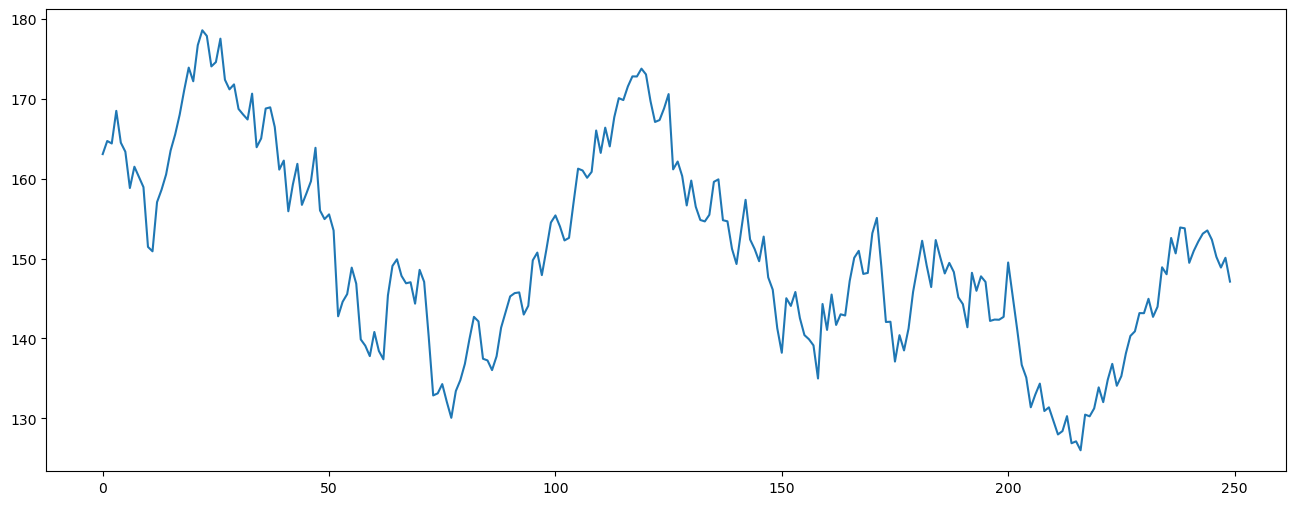

In [79]:
df['Open'].plot(figsize=(16,6))

# Splitting the data into training and test sets

In [80]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [81]:
X = df[['Open', 'High', 'Low','Volume']]
y = df['Close']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)

In [83]:
X_train.shape

(187, 4)

In [19]:
X_test.shape

(63, 4)

# Create a Regressor from sklearn's Linear Regression Module 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print(regressor.coef_)

[-7.35533823e-01  7.80181967e-01  9.48548080e-01  3.18423399e-10]


In [23]:
print(regressor.intercept_)

1.3843996072545508


# Make Predictions and Evaluate the results 

In [24]:
predicted = regressor.predict(X_test)

In [25]:
print(X_test)

           Open        High         Low    Volume
225  135.279999  138.020004  134.220001  79972200
122  167.080002  168.710007  166.649994  54147100
92   145.759995  148.449997  145.050003  77588800
157  139.130005  140.360001  138.160004  70433700
154  142.539993  143.100006  139.449997  85925600
..          ...         ...         ...       ...
188  148.309998  148.880005  147.119995  35195900
15   163.509995  166.350006  163.009995  95811400
217  130.470001  133.410004  129.889999  70790800
74   133.130005  133.889999  131.479996  84784300
7    161.479996  163.410004  159.410004  91454900

[63 rows x 4 columns]


In [26]:
predicted.shape

(63,)

In [27]:
df = pd.DataFrame(y_test,predicted)

In [28]:
df= pd.DataFrame({'Actual':y_test, 'Predicted':predicted})

In [29]:
print(df)

         Actual   Predicted
225  137.869995  136.901692
122  167.229996  168.208686
92   145.860001  147.602612
157  138.339996  139.629751
154  140.089996  140.487845
..          ...         ...
188  148.110001  148.012471
15   165.380005  165.553869
217  130.149994  132.732831
74   132.759995  132.663436
7    162.949997  161.337114

[63 rows x 2 columns]


In [30]:
df.head(25)

,Actual,Predicted
225,137.869995,136.901692
122,167.229996,168.208686
92,145.860001,147.602612
157,138.339996,139.629751
154,140.089996,140.487845
161,143.750000,142.231186
198,142.160004,143.934262
83,137.440002,139.012660
63,149.639999,149.037828
155,140.419998,140.264924


In [31]:
regressor.score(X_test,y_test)

0.9906553214625202

In [32]:
import math 

In [33]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.9164423876549939


In [34]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 1.3271616050100326


In [35]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.1520250019031846


# Plot the predicted and actual values

In [36]:
graph = df.head(20)

<AxesSubplot:>

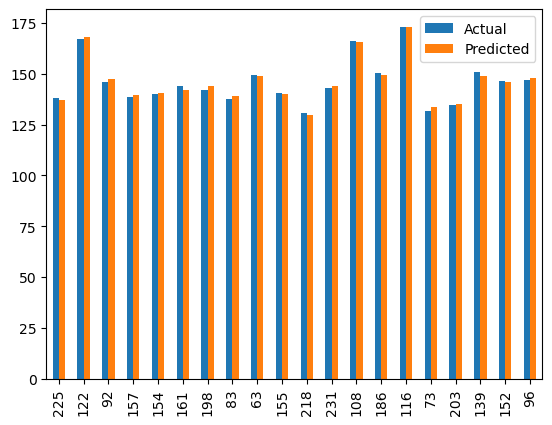

In [85]:
graph.plot(kind = 'bar')


In fact, -	Stock price can never be actually predicted because it is determined by a lot of factors.